Getting all the imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats as st


This is to import the csv

In [2]:
movie_csv = "movies.csv"
movie_df = pd.read_csv(movie_csv, encoding = "ISO-8859-1")
movie_df.head()

,Const,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,...,Rotten_Tomatoes_Rating,Metacritic_Rating,Rated,Home_Release,Production,Country,Awards_Blurb,Languages,Month Released,Awards
0,tt0035423,Kate & Leopold,https://www.imdb.com/title/tt0035423/,movie,6.4,118.0,2001.0,"['Comedy', ' Fantasy', ' Romance']",77905.0,2001-12-11,...,50.0,44.0,PG-13,2002-Jun-11,Miramax Films,USA,Nominated for 1 Oscar. Another 1 win & 4 nomin...,"['English', ' French']",12.0,"{'Oscar.': 1, 'win': 1, 'nominations.': 5}"
1,tt0065643,The Dirty Mind of Young Sally,https://www.imdb.com/title/tt0065643/,movie,5.2,95.0,1973.0,['Comedy'],226.0,1973-04-20,...,NaN,NaN,X,0,NaN,USA,NaN,['English'],4.0,{}
2,tt0067716,Schlock,https://www.imdb.com/title/tt0067716/,movie,5.7,80.0,1973.0,"['Comedy', ' Horror', ' Sci-Fi']",1221.0,1973-04-11,...,71.0,NaN,PG,2001-Oct-02,Jack H. Harris Enterprises,USA,1 win & 1 nomination.,['English'],4.0,"{'win': 1, 'nomination.': 1}"
3,tt0068156,1776,https://www.imdb.com/title/tt0068156/,movie,7.6,141.0,1972.0,"['Drama', ' Family', ' History', ' Musical']",7588.0,1972-11-09,...,69.0,NaN,G,2002-Jul-02,Sony Pictures Home Entertainment,USA,Nominated for 1 Oscar. Another 1 win & 1 nomin...,['English'],11.0,Could not parse awards
4,tt0068168,Across 110th Street,https://www.imdb.com/title/tt0068168/,movie,7.0,102.0,1972.0,"['Action', ' Crime', ' Drama', ' Thriller']",4923.0,1972-12-19,...,81.0,NaN,R,2001-Oct-16,MGM,USA,NaN,"['English', ' Italian']",12.0,{}


This is to split up the DataFrame by a few genres;

horror_df has all horror movies

romance_df has all romance movies

sciFi_df has all sci-fi

In [3]:
movie_df['is_horror'] = ''
movie_df['is_romance'] = ''
movie_df['is_sci-fi'] = ''

for value, row in movie_df.iterrows():
    movie_df.loc[value, 'is_horror'] = 'Horror' in row['Genres']
    movie_df.loc[value, 'is_romance'] = 'Romance' in row['Genres']
    movie_df.loc[value, 'is_sci-fi'] = 'Sci-Fi' in row['Genres']
horror_df = movie_df[movie_df['is_horror']==True]
romance_df = movie_df[movie_df['is_romance']==True]
sciFi_df = movie_df[movie_df['is_sci-fi']==True]
sciFi_df.head()

,Const,Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,...,Home_Release,Production,Country,Awards_Blurb,Languages,Month Released,Awards,is_horror,is_romance,is_sci-fi
2,tt0067716,Schlock,https://www.imdb.com/title/tt0067716/,movie,5.7,80.0,1973.0,"['Comedy', ' Horror', ' Sci-Fi']",1221.0,1973-04-11,...,2001-Oct-02,Jack H. Harris Enterprises,USA,1 win & 1 nomination.,['English'],4.0,"{'win': 1, 'nomination.': 1}",True,False,True
12,tt0068595,Flesh Gordon,https://www.imdb.com/title/tt0068595/,movie,4.7,78.0,1974.0,"['Comedy', ' Sci-Fi']",3839.0,1974-07-30,...,2004-Jan-27,NaN,USA,1 nomination.,['English'],7.0,{'nomination.': 1},False,False,True
37,tt0069768,Battle for the Planet of the Apes,https://www.imdb.com/title/tt0069768/,movie,5.5,93.0,1973.0,"['Action', ' Sci-Fi']",28321.0,1973-06-15,...,2009-May-05,20th Century Fox,USA,2 nominations.,['English'],6.0,{'nominations.': 2},False,False,True
48,tt0069895,The Crazies,https://www.imdb.com/title/tt0069895/,movie,6.1,103.0,1973.0,"['Action', ' Horror', ' Sci-Fi']",11011.0,1973-03-16,...,2003-Apr-29,Blue Underground,USA,NaN,['English'],3.0,{},True,False,True
51,tt0069945,Dark Star,https://www.imdb.com/title/tt0069945/,movie,6.3,83.0,1974.0,"['Comedy', ' Sci-Fi']",21782.0,1974-04-30,...,1999-Mar-16,Jack H. Harris Enterprises Inc,USA,1 win & 2 nominations.,['English'],4.0,"{'win': 1, 'nominations.': 2}",False,False,True


These dfs will be useful in finding if box office or IMDb rating is influenced by the month of release.  The box_office will be a sum, the tating will be a mean and the title will be a count:

In [4]:
monthly_horror = horror_df.groupby('Month Released').agg({
    'Box_Office': 'sum',
    'IMDb Rating': 'mean',
    'Title': 'count'
})
monthly_horror.rename({
    'Box_Office': 'Box_Office_Total',
    'IMDb Rating': 'Average_Rating',
    'Title': 'Total_Movies'
},inplace = True, axis = 1)
monthly_romance = romance_df.groupby('Month Released').agg({
    'Box_Office': 'sum',
    'IMDb Rating': 'mean',
    'Title': 'count'
})
monthly_romance.rename({
    'Box_Office': 'Box_Office_Total',
    'IMDb Rating': 'Average_Rating',
    'Title': 'Total_Movies'
},inplace = True, axis = 1)
monthly_sciFi = sciFi_df.groupby('Month Released').agg({
    'Box_Office': 'sum',
    'IMDb Rating': 'mean',
    'Title': 'count'
})
monthly_sciFi.rename({
    'Box_Office': 'Box_Office_Total',
    'IMDb Rating': 'Average_Rating',
    'Title': 'Total_Movies'
},inplace = True, axis = 1)

all_genres_monthly = movie_df.groupby('Month Released').agg({
    'Box_Office': 'sum',
    'IMDb Rating': 'mean',
    'Title': 'count',
    'Runtime (mins)': 'mean'
}).reset_index()
all_genres_monthly.rename({
    'Box_Office': 'Box_Office_Total',
    'IMDb Rating': 'Average_Rating',
    'Title': 'Total_Movies',
    'Runtime (mins)': 'Average_Runtime'
    
},inplace = True, axis = 1)

monthly_horror = monthly_horror.reset_index()
monthly_romance = monthly_romance.reset_index()
monthly_sciFi = monthly_sciFi.reset_index()
all_genres_monthly.head()

,Month Released,Box_Office_Total,Average_Rating,Total_Movies,Average_Runtime
0,1.0,3.882921e+09,6.318569,587,97.834471
1,2.0,5.247749e+09,6.208470,366,103.251366
2,3.0,6.907978e+09,6.167134,499,100.150301
3,4.0,6.540193e+09,6.077049,488,99.381148
4,5.0,7.978533e+09,6.249351,462,105.898268


These DataFrames will track the success of certain genres depending on year of release.  The box_office will be a sum, the tating will be a mean and the title will be a count:

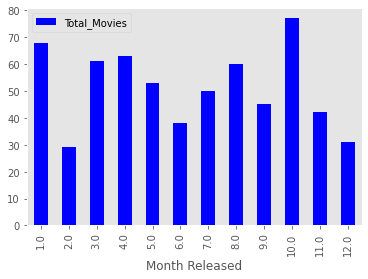

In [6]:
yearly_horror = horror_df.groupby('Year').agg({
    'Box_Office': 'sum',
    'IMDb Rating': 'mean',
    'Title': 'count'
})
yearly_horror.rename({
    'Box_Office': 'Box_Office_Total',
    'IMDb Rating': 'Average_Rating',
    'Title': 'Total_Movies'
},inplace = True, axis = 1)

yearly_romance = romance_df.groupby('Year').agg({
    'Box_Office': 'sum',
    'IMDb Rating': 'mean',
    'Title': 'count'
})
yearly_romance.rename({
    'Box_Office': 'Box_Office_Total',
    'IMDb Rating': 'Average_Rating',
    'Title': 'Total_Movies'
},inplace = True, axis = 1)

yearly_sciFi = sciFi_df.groupby('Year').agg({
    'Box_Office': 'sum',
    'IMDb Rating': 'mean',
    'Title': 'count'
})
yearly_sciFi.rename({
    'Box_Office': 'Box_Office_Total',
    'IMDb Rating': 'Average_Rating',
    'Title': 'Total_Movies'
},inplace = True, axis = 1)

all_genres_yearly = movie_df.groupby('Year').agg({
    'Box_Office': 'sum',
    'IMDb Rating': 'mean',
    'Title': 'count',
    'Runtime (mins)': 'mean'
}).reset_index()
all_genres_yearly.rename({
    'Box_Office': 'Box_Office_Total',
    'IMDb Rating': 'Average_Rating',
    'Title': 'Total_Movies',
    'Runtime (mins)': 'Average_Runtime'
    
},inplace = True, axis = 1)
    
yearly_horror = yearly_horror.reset_index()
yearly_romance = yearly_romance.reset_index()
yearly_sciFi = yearly_sciFi.reset_index()

monthly_horror.plot.bar('Month Released','Total_Movies', grid = False, color = 'blue')
plt.style.use('ggplot')
plt.show()


### **As a quick reference the parent Dataframes are as follows:**

##### The master dataframe is called: 

 - **movies_df**
 
### The truncated genre dataframes are called:

 - **monthly_horror**
 - **monthly_romance**
 - **monthly_sciFi**
 
### **The ones made for your use are as follows:**

##### The monthly DataFrames are called:

 - **monthly_horror**
 - **monthly_romance**
 - **monthly_sciFi**
 
##### The yearly DataFrames are called:
 
 - **yearly_horror** 
 - **yearly_romance**
 - **yearly_sciFi**
  
  *Let me know if you need these in a differnt form or if I should merge like-DataFrames together. If I merge them the column named would need to be long *ie: "horror_Box_Office"* 
  *I thought it would be easier to type this way, but if you prefer the organization of merged dataframes, just let me know and I'll get right on it.
 